# Logistic regression using `statsmodels`

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [82]:

var_names = [
    'age',
    'sex',
    'total_bilirubin',
    'direct_bilirubin',
    'alp',  # Alkaline phosphatase
    'alt',  # Alanine transaminase
    'ast',  # Aspartate transaminase
    'total_protein',
    'albumin',
    'ag_ratio',  # Albumin/globulin ratio
    'liver_disease'
]

Read in the [Indian Liver Patient Dataset (ILPD)](https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29).

In [83]:
df = pd.read_csv('datasets/ilpd.csv',header=None, names=var_names)
df.head()

,age,sex,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,ag_ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [84]:
df['liver_disease'].unique()

array([1, 2], dtype=int64)

In [85]:
df.describe()

,age,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,ag_ratio,liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Perform some basic data exploration.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
sex                 583 non-null object
total_bilirubin     583 non-null float64
direct_bilirubin    583 non-null float64
alp                 583 non-null int64
alt                 583 non-null int64
ast                 583 non-null int64
total_protein       583 non-null float64
albumin             583 non-null float64
ag_ratio            579 non-null float64
liver_disease       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# EDA

In [87]:
liver_disease = df['liver_disease'].value_counts()
liver_disease

1    416
2    167
Name: liver_disease, dtype: int64

In [88]:
df.shape

(583, 11)

- Number of liver disease positive is 414
- Number of liver disease negative is 165

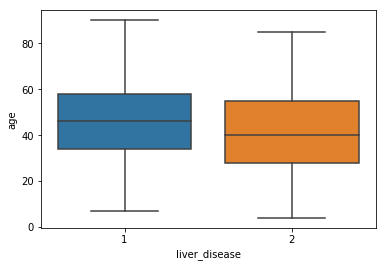

In [89]:
sns.boxplot(x='liver_disease', y='age', data=df)

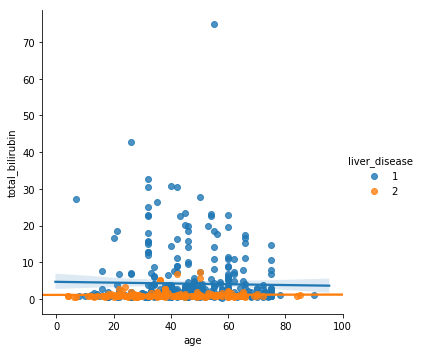

In [90]:
sns.lmplot(x='age',y='total_bilirubin',data=df,hue='liver_disease')

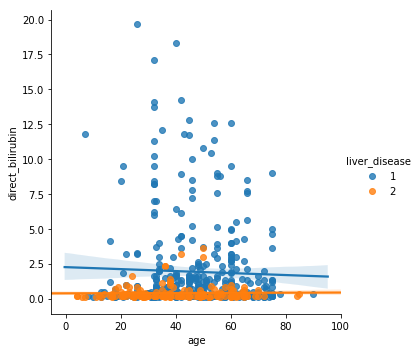

In [91]:
sns.lmplot(x='age',y='direct_bilirubin',data=df,hue='liver_disease')

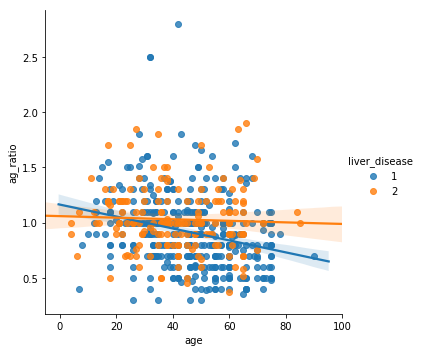

In [92]:
sns.lmplot(x='age',y='ag_ratio',data=df,hue='liver_disease')

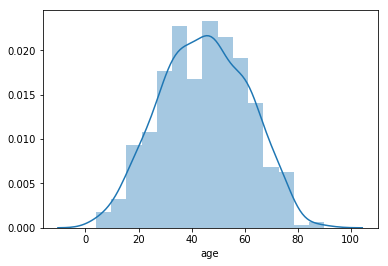

In [93]:
sns.distplot(df['age'])

C:\Users\Phoenix\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Phoenix\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


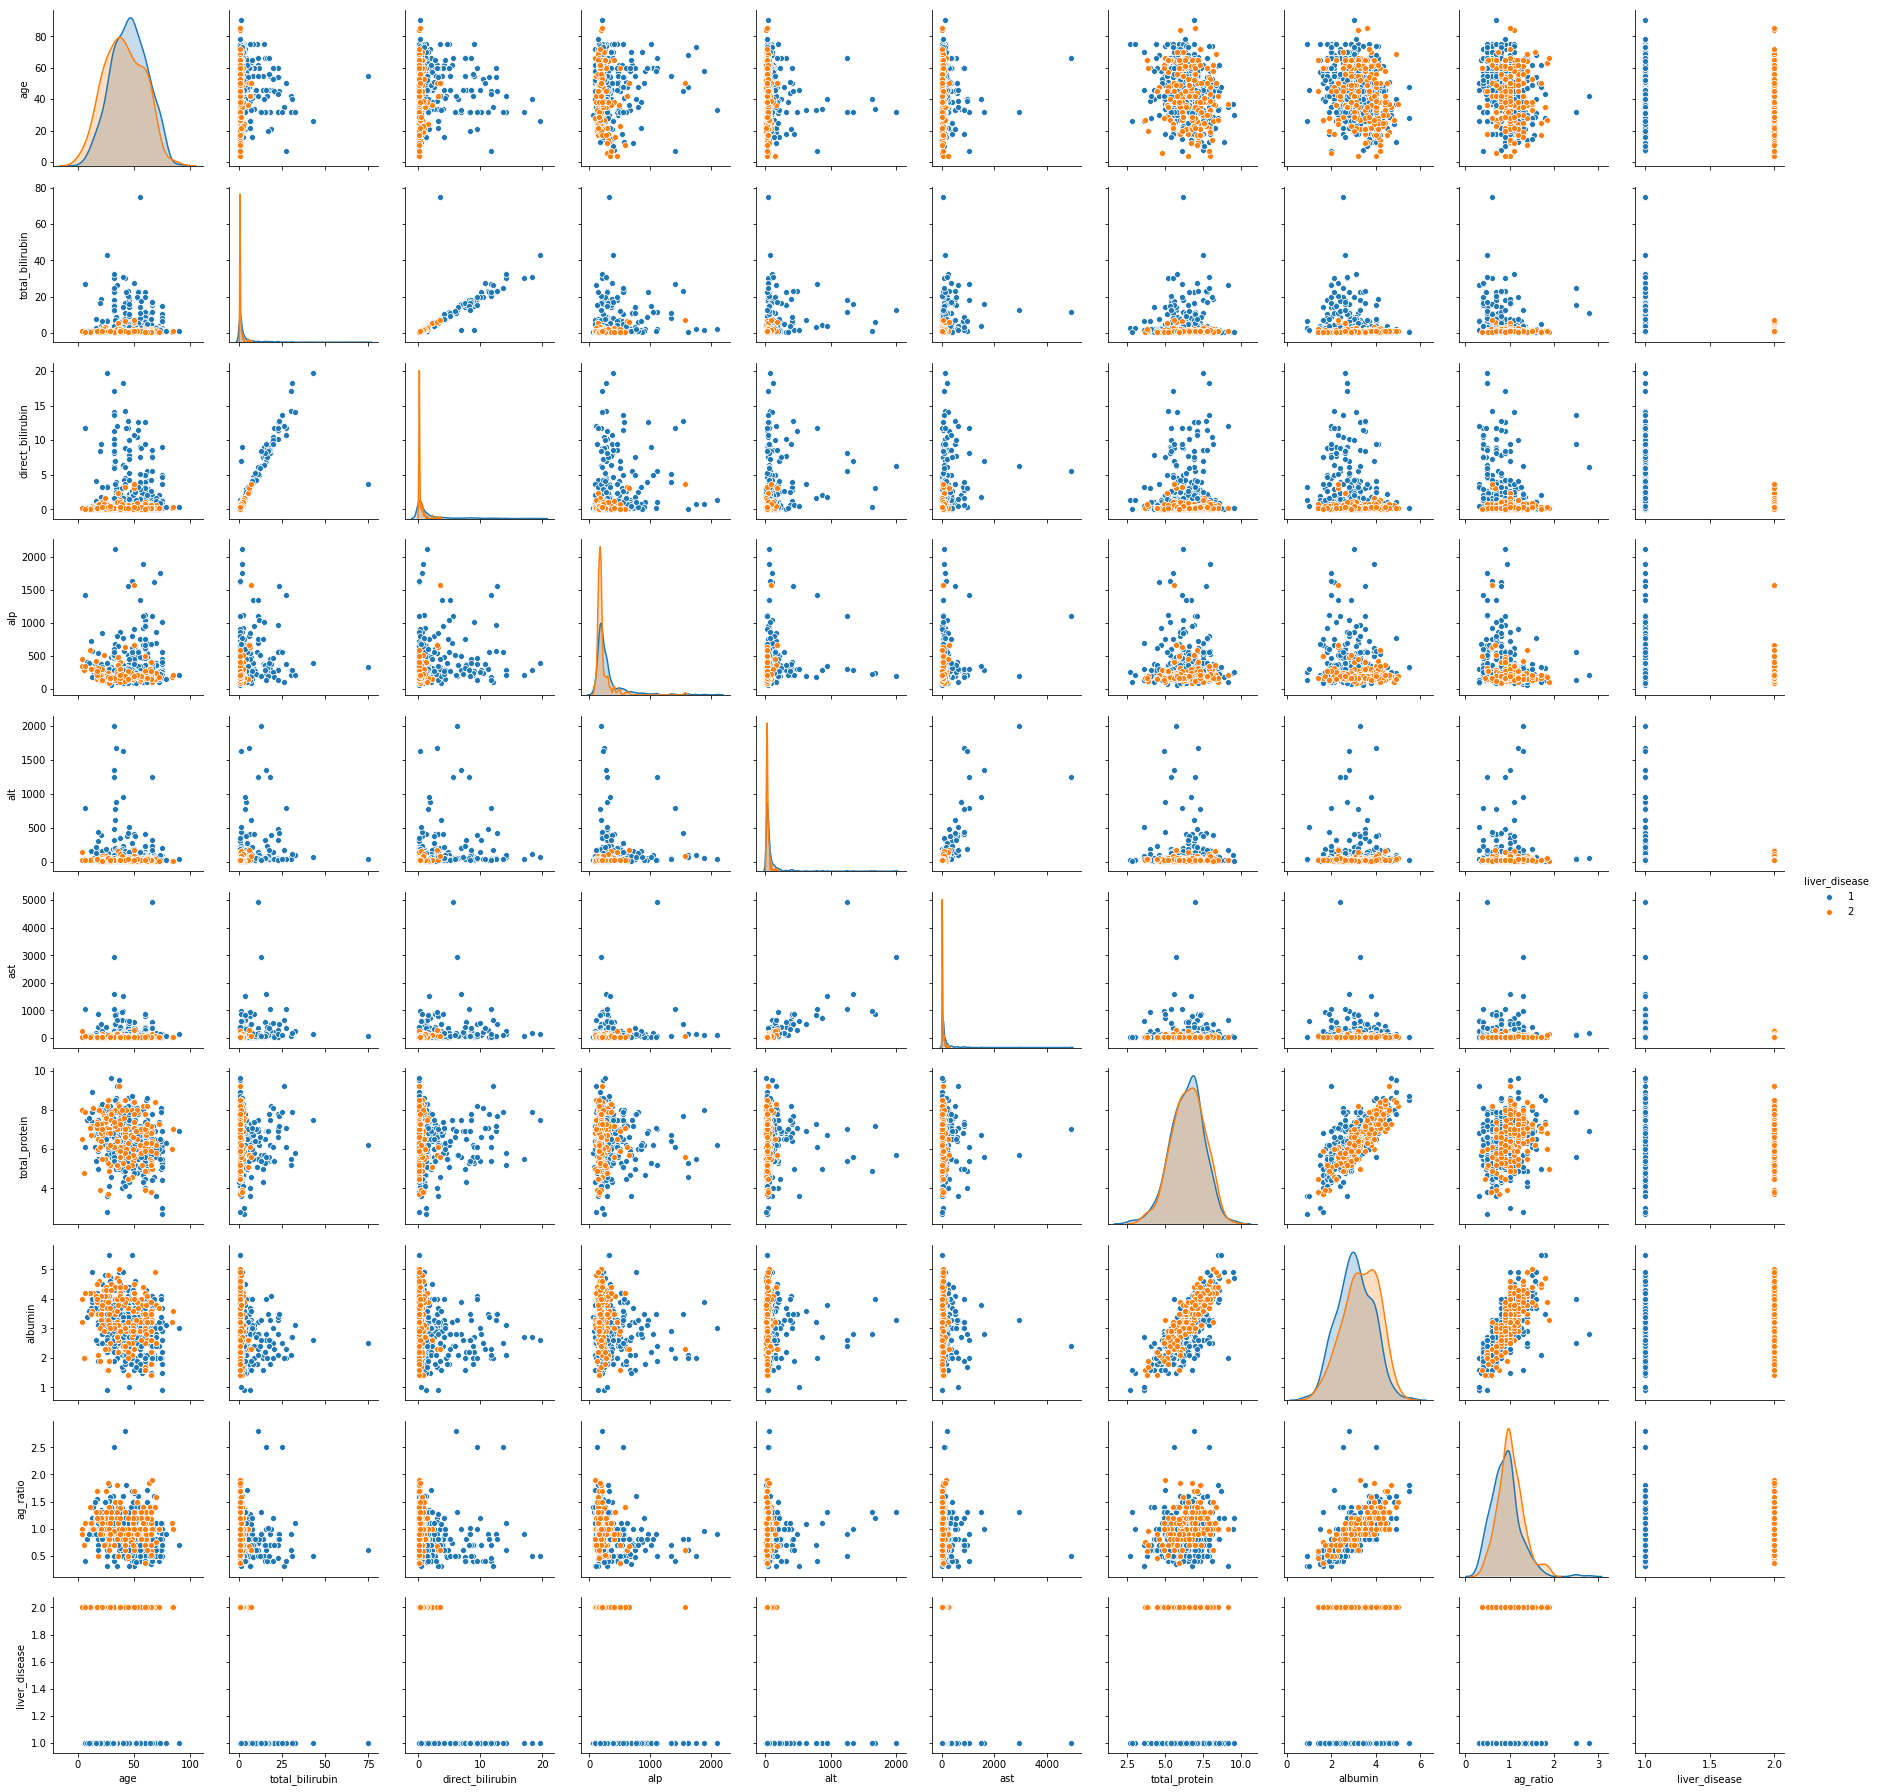

In [94]:
sns.pairplot(df, hue='liver_disease')

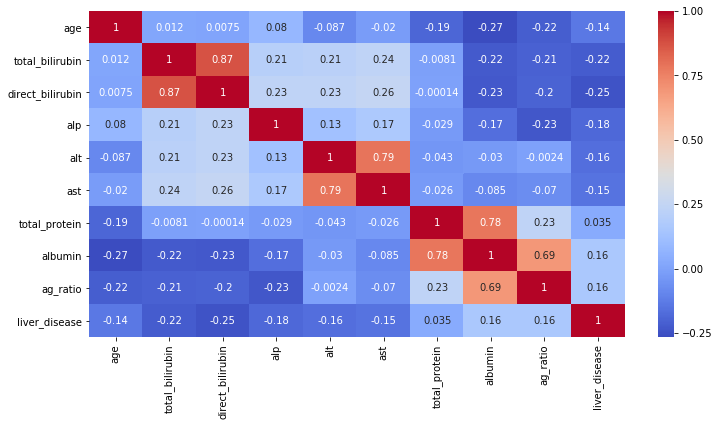

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [96]:
df.columns

Index(['age', 'sex', 'total_bilirubin', 'direct_bilirubin', 'alp', 'alt',
       'ast', 'total_protein', 'albumin', 'ag_ratio', 'liver_disease'],
      dtype='object')

In [97]:
df.head()

,age,sex,total_bilirubin,direct_bilirubin,alp,alt,ast,total_protein,albumin,ag_ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [98]:
df.isnull().sum()

age                 0
sex                 0
total_bilirubin     0
direct_bilirubin    0
alp                 0
alt                 0
ast                 0
total_protein       0
albumin             0
ag_ratio            4
liver_disease       0
dtype: int64

In [99]:
df = df.dropna(axis=1)

In [100]:
predictors = ['age', 'sex', 'total_bilirubin', 'direct_bilirubin', 'alp', 'alt',
       'ast', 'total_protein', 'albumin', 'ag_ratio']
response = 'liver_disease'
all_vars = predictors + [response]

In [101]:
df['liver_disease'].unique()

array([1, 2], dtype=int64)

In [102]:
df['liver_disease'] = (df['liver_disease'] == 1).astype(int)
df['liver_disease'].unique()

C:\Users\Phoenix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([1, 0], dtype=int64)

# Build a logistic regression model including all predictors.

In [103]:
formula = 'liver_disease ~ ' + ' + '.join(x for x in df.columns if x != 'liver_disease')
model_full = smf.logit(formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.493605
         Iterations 9


In [104]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          liver_disease   No. Observations:                  583
Model:                          Logit   Df Residuals:                      573
Method:                           MLE   Df Model:                            9
Date:                Sat, 20 Apr 2019   Pseudo R-squ.:                  0.1759
Time:                        12:43:17   Log-Likelihood:                -287.77
converged:                       True   LL-Null:                       -349.18
                                        LLR p-value:                 3.529e-22
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9484      0.808     -2.413      0.016      -3.531      -0.366
sex[T.Male]          0.0552      0.230      0.240      0.810      -0.396       0.506
age                  0.0188      0.006      2.936      0.003       0.006       0.031
total_bilirubin      0.0102      0.087      0.117      0.907      -0.160       0.181
direct_bilirubin     0.4602      0.239      1.922      0.055      -0.009       0.929
alp                  0.0011      0.001      1.462      0.144      -0.000       0.003
alt                  0.0107      0.005      2.160      0.031       0.001       0.020
ast                  0.0032      0.003      0.999      0.318      -0.003       0.009
total_protein        0.3919      0.179      2.191      0.028       0.041       0.743
albumin             -0.5823      0.256     -2.278      0.023      -1.083      -0.081
====================================================================================
"""

Drop predictors that are not statistically significant ($p > 0.05$).

In [105]:
cols_excluded = {'liver_disease'} | (set(model_full.pvalues.index[model_full.pvalues > 0.05]) - {'Intercept'})
formula = 'liver_disease ~ ' + ' + '.join(x for x in df.columns if x not in cols_excluded)
model_sig = smf.logit(formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.516973
         Iterations 9


In [106]:
model_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          liver_disease   No. Observations:                  583
Model:                          Logit   Df Residuals:                      577
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 Apr 2019   Pseudo R-squ.:                  0.1369
Time:                        12:43:24   Log-Likelihood:                -301.40
converged:                       True   LL-Null:                       -349.18
                                        LLR p-value:                 4.518e-19
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5766      0.781     -2.019      0.044      -3.107      -0.046
sex[T.Male]       0.1583      0.225      0.705      0.481      -0.282       0.599
age               0.0192      0.006      3.015      0.003       0.007       0.032
alt               0.0203      0.004      4.980      0.000       0.012       0.028
total_protein     0.5825      0.164      3.544      0.000       0.260       0.905
albumin          -0.9878      0.228     -4.338      0.000      -1.434      -0.541
=================================================================================
"""

Print out and interpret the odds ratios.

In [111]:
np.exp(model_sig.params)

Intercept        0.206684
sex[T.Male]      1.171549
age              1.019340
alt              1.020517
total_protein    1.790567
albumin          0.372410
dtype: float64

In [112]:
np.exp(model_sig.conf_int())

,0,1
Intercept,0.044724,0.955140
sex[T.Male],0.754337,1.819515
age,1.006725,1.032113
alt,1.012392,1.028707
total_protein,1.297420,2.471159
albumin,0.238332,0.581916


In [113]:
model_sig.pvalues

Intercept        4.351494e-02
sex[T.Male]      4.808895e-01
age              2.570236e-03
alt              6.370007e-07
total_protein    3.939879e-04
albumin          1.440906e-05
dtype: float64

Plot the distribution of the model predictions.

In [120]:
my_predictions_sig = model_sig.predict()
my_predictions_full = model_full.predict()

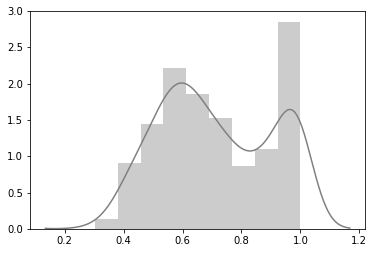

In [123]:
# Plot the distribution of predictions of all predictors
sns.distplot(my_predictions_full, color ='grey')

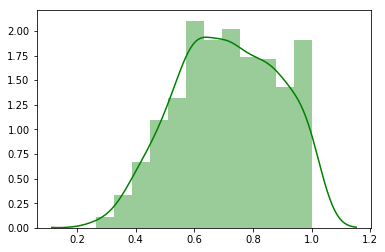

In [124]:
# Plot the distribution of predictions after drop predictors that are not statistically significant ( 𝑝>0.05 ).
sns.distplot(my_predictions_sig, color ='green')

Assuming a 50% cut-off value for the probability of liver disease, compare the fitted values to the outcome.

*Hint*: use `pd.crosstab` to produce a two-by-two table.

In [125]:
pd.crosstab(my_predictions_sig > 0.5, df['liver_disease'])

liver_disease,0,1
row_0,,
False,33,33
True,134,383
